# Case Study on Regression

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
car_data = pd.read_csv('car_age_price.csv')

In [3]:
car_data.columns

Index(['Year', 'Price'], dtype='object')

In [4]:
car_data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [5]:
car_data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [6]:
print(car_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB
None


Text(0.5, 1.0, 'Scatter Plot: Year vs. Price')

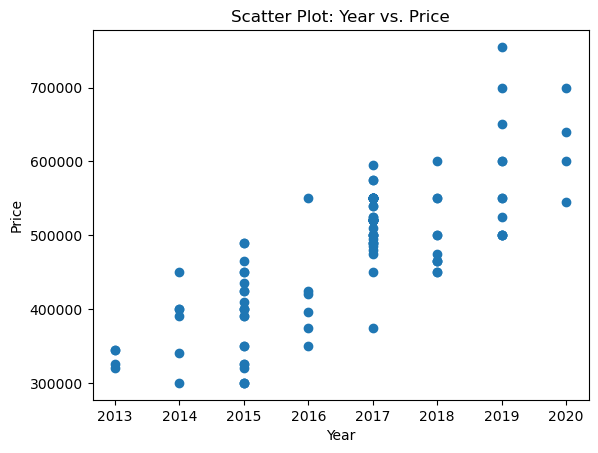

In [33]:
plt.scatter(car_data['Year'], car_data['Price'], label="Data Points")
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Scatter Plot: Year vs. Price')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Data Splitting

### Linear Regression

In [8]:
X = car_data[['Year']]
y = car_data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

### Model Evaluation

In [35]:
y_pred = model.predict(X)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [36]:
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error: 46514.59
Mean Squared Error: 3276721166.56
R-squared (R2) Score: 0.60


### Visualization of Linear Regression Line

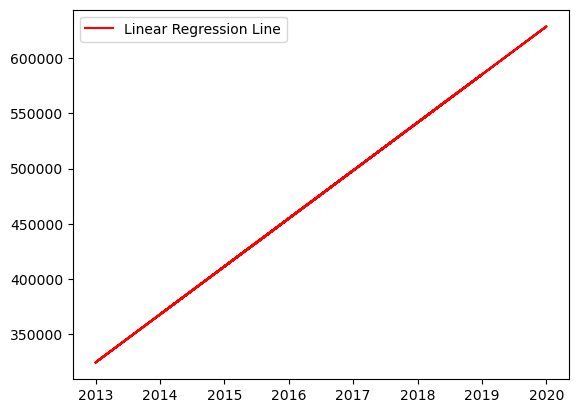

In [37]:
plt.plot(X, y_pred, color='red', label="Linear Regression Line")
plt.legend()
plt.show()

## Linear Regression

In [38]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_predictions = linear_reg.predict(X_test)

## Lasso Regression

In [39]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)
lasso_predictions = lasso_reg.predict(X_test)

## Model Evaluation

In [42]:
linear_mae = mean_absolute_error(y_test, linear_predictions)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)

In [43]:
print(linear_mae)
print(lasso_mae)

53534.77957001264
53534.77507740583


## Model Comparison

In [44]:
best_model = linear_reg if linear_mae < lasso_mae else lasso_reg

In [45]:
print(f"Best Model: {'Linear Regression' if best_model == linear_reg else 'Lasso Regression'}")

Best Model: Lasso Regression


## Predicting the Price for a 2022 Model

In [46]:
input_data_2022 = pd.DataFrame({'Year': [2022]})
predicted_price_2022 = best_model.predict(input_data_2022)

print(f"Predicted price for a 2022 model: Rs {predicted_price_2022[0]:.2f}")

Predicted price for a 2022 model: Rs 743601.59
